In [124]:
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
import numpy as np

import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay #Визуализация границ решений.

sns.set(rc={'figure.figsize':(15,8)})
from sklearn.linear_model import LogisticRegression, SGDClassifier 

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, accuracy_score, RocCurveDisplay, roc_curve,ConfusionMatrixDisplay, classification_report

import pandas as pd

In [127]:
X, y = make_classification(n_samples=110, n_features=20, n_informative=2)

In [128]:
X = X[:, [2, 3]]

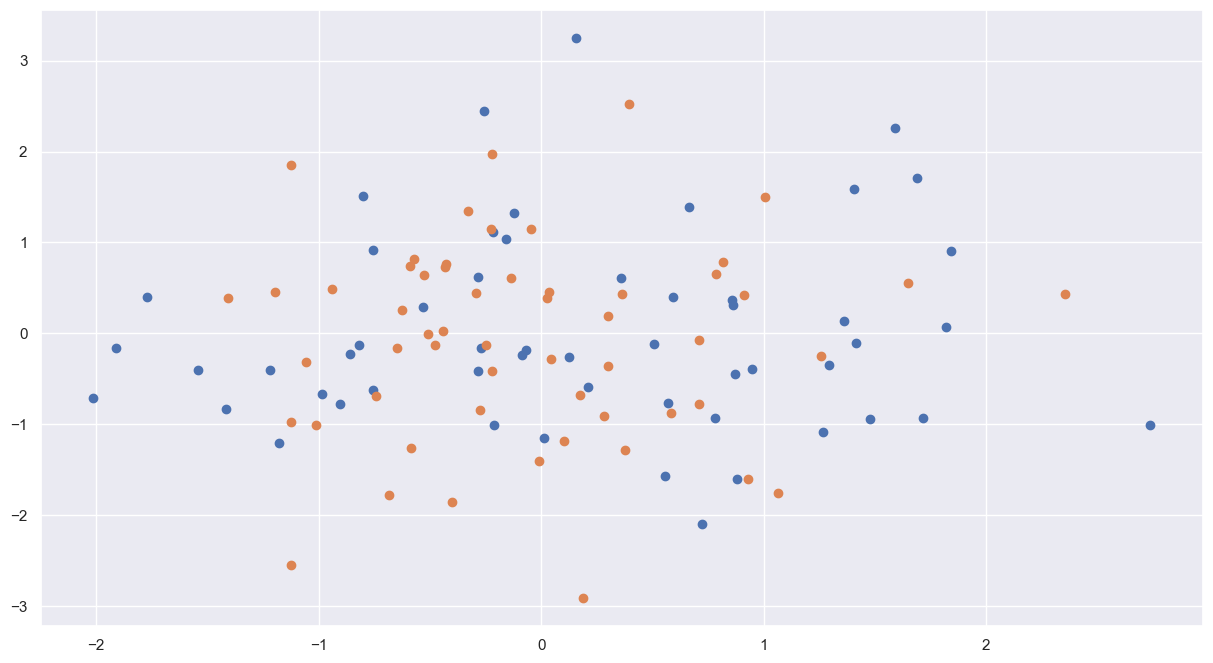

In [129]:
for class_value in range(2):
    # помещает на график точки из массива х(преврещенного в координаты (обрезанные до двух значений)), покрашенные массивоим у
    row_ix = where(y == class_value)
    # создать разброс этих образцов
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [130]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [8]:
y_pred = model.predict_proba(X)

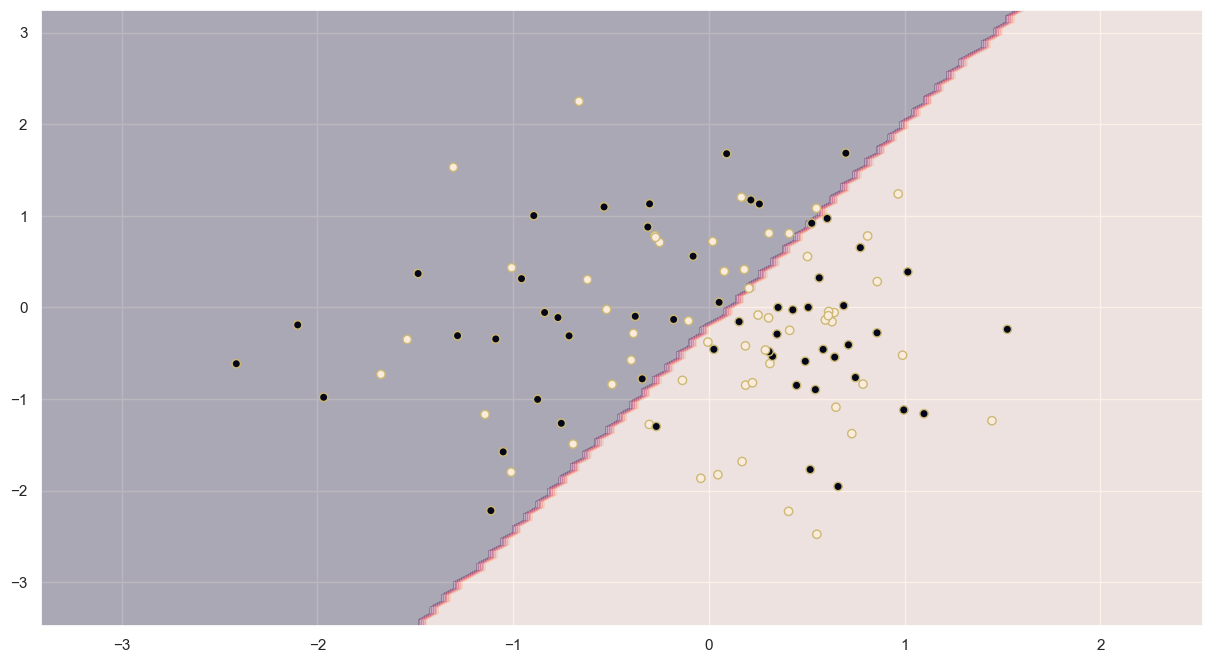

In [9]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.3
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="y")

In [10]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

2.220446049250313e-16

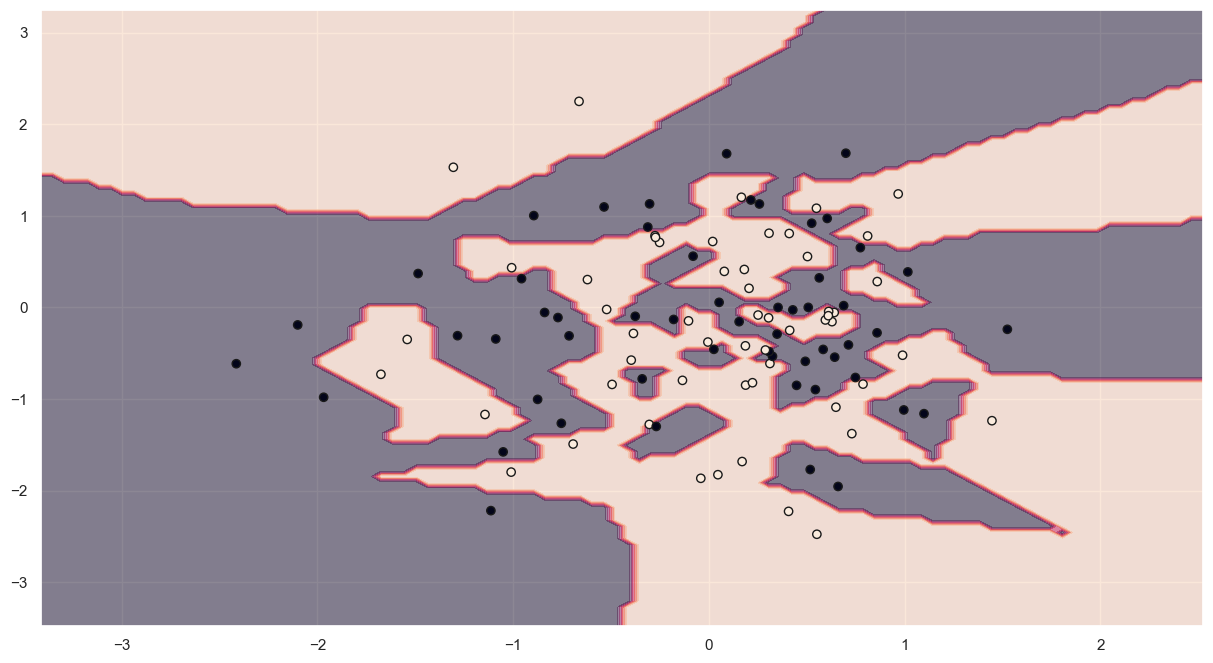

In [12]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

In [13]:
model = SVC(gamma='auto', kernel='poly',probability=True)
model.fit(X, y)

SVC(gamma='auto', kernel='poly', probability=True)

In [14]:
y_pred = model.predict_proba(X)
log_loss(y, y_pred)

0.7014021511839053

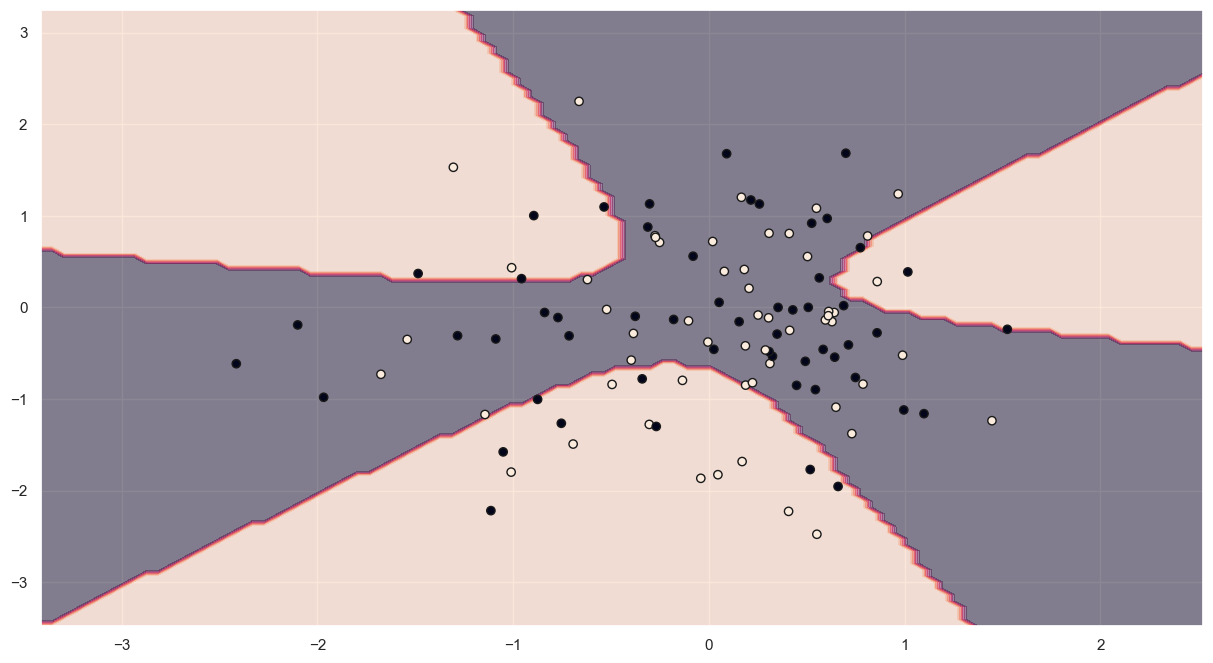

In [15]:
disp = DecisionBoundaryDisplay.from_estimator(
     model, X, response_method="predict",
     alpha=0.5
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Проанализируем датасет побольше

In [277]:
data= pd.read_csv('credit_score_prediction.csv')

In [278]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [469]:
unique_values = data['Occupation'].unique()

# Выводим результат
print(unique_values)

['Scientist' <NA> 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician' 'Mechanic'
 'Writer' 'Architect']


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20375 non-null  object 
 1   Customer_ID               20375 non-null  object 
 2   Month                     20375 non-null  object 
 3   Name                      18344 non-null  object 
 4   Age                       20375 non-null  object 
 5   SSN                       20375 non-null  object 
 6   Occupation                20375 non-null  object 
 7   Annual_Income             20375 non-null  object 
 8   Monthly_Inhand_Salary     17331 non-null  float64
 9   Num_Bank_Accounts         20375 non-null  int64  
 10  Num_Credit_Card           20375 non-null  int64  
 11  Interest_Rate             20375 non-null  int64  
 12  Num_of_Loan               20375 non-null  object 
 13  Type_of_Loan              18111 non-null  object 
 14  Delay_

In [290]:
data.dropna()
#data.info()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Poor
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,0x8d53,CUS_0xaa5,June,Sakarit,35,593-90-9236,Media_Manager,60493.08,4976.090000,9,...,Bad,3680.62,30.690625,13 Years and 9 Months,Yes,432.581034,121.71503053114913,High_spent_Medium_value_payments,193.31293581667137,Poor
20367,0x8d55,CUS_0xaa5,August,Sakarit,35_,593-90-9236,Media_Manager,60493.08,4976.090000,9,...,Bad,3680.62,32.261276,13 Years and 11 Months,Yes,432.581034,298.3226387493229,Low_spent_Large_value_payments,36.705327598497604,Poor
20368,0x8d5a,CUS_0x1f2e,January,Stefano Bernabeiq,4380,049-84-5378,Entrepreneur,41012.42,3341.701667,5,...,Standard,1690.55,26.118010,7 Years and 4 Months,Yes,199.367803,351.3410331365624,Low_spent_Small_value_payments,73.46133096792437,Poor
20369,0x8d5b,CUS_0x1f2e,February,Stefano Bernabeiq,26,049-84-5378,Entrepreneur,41012.42,3341.701667,5,...,Standard,1690.55,26.469843,7 Years and 5 Months,Yes,199.367803,205.38176124567588,Low_spent_Large_value_payments,199.42060285881084,Poor


In [294]:
# Заменяем "_" на NaN (null)
data.replace('_', '', inplace=True)

print(data)

           ID Customer_ID     Month               Name   Age          SSN  \
0      0x1602   CUS_0xd40   January      Aaron Maashoh    23  821-00-0265   
1      0x1603   CUS_0xd40  February      Aaron Maashoh    23  821-00-0265   
2      0x1604   CUS_0xd40     March      Aaron Maashoh  -500  821-00-0265   
3      0x1605   CUS_0xd40     April      Aaron Maashoh    23  821-00-0265   
4      0x1606   CUS_0xd40       May      Aaron Maashoh    23  821-00-0265   
...       ...         ...       ...                ...   ...          ...   
20370  0x8d5c  CUS_0x1f2e     March  Stefano Bernabeiq    26  049-84-5378   
20371  0x8d5d  CUS_0x1f2e     April  Stefano Bernabeiq    26  049-84-5378   
20372  0x8d5e  CUS_0x1f2e       May  Stefano Bernabeiq    26  049-84-5378   
20373  0x8d5f  CUS_0x1f2e      June                NaN   26_  049-84-5378   
20374  0x8d60  CUS_0x1f2e      July  Stefano Bernabeiq    26  049-84-5378   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts

In [299]:
data['Age'] = data['Age'].replace(to_replace=r'\D', value='', regex=True)
data['Age'] = pd.to_numeric(data['Age'])

In [300]:
first_row = data.iloc[8]
print(first_row)

ID                                                  0x160e
Customer_ID                                     CUS_0x21b1
Month                                              January
Name                                       Rick Rothackerj
Age                                                     28
SSN                                            004-07-5839
Occupation                                         _______
Annual_Income                                     34847.84
Monthly_Inhand_Salary                          3037.986667
Num_Bank_Accounts                                        2
Num_Credit_Card                                          4
Interest_Rate                                            6
Num_of_Loan                                              1
Type_of_Loan                           Credit-Builder Loan
Delay_from_due_date                                      3
Num_of_Delayed_Payment                                   4
Changed_Credit_Limit                                  5.

In [311]:
#count = (data['Occupation'] == '_____').sum()
count = data['Occupation'].str.contains('_+', regex=True).sum()

print(count)

1311


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20375 non-null  object 
 1   Customer_ID               20375 non-null  object 
 2   Month                     20375 non-null  object 
 3   Name                      18344 non-null  object 
 4   Age                       20375 non-null  int64  
 5   SSN                       20375 non-null  object 
 6   Occupation                18966 non-null  object 
 7   Annual_Income             20375 non-null  object 
 8   Monthly_Inhand_Salary     17331 non-null  float64
 9   Num_Bank_Accounts         20375 non-null  int64  
 10  Num_Credit_Card           20375 non-null  int64  
 11  Interest_Rate             20375 non-null  int64  
 12  Num_of_Loan               20375 non-null  object 
 13  Type_of_Loan              18111 non-null  object 
 14  Delay_

In [313]:
data = data[~data['Occupation'].str.contains('_+', regex=True, na=False)]

print(data)

           ID Customer_ID     Month               Name  Age          SSN  \
0      0x1602   CUS_0xd40   January      Aaron Maashoh   23  821-00-0265   
1      0x1603   CUS_0xd40  February      Aaron Maashoh   23  821-00-0265   
2      0x1604   CUS_0xd40     March      Aaron Maashoh  500  821-00-0265   
3      0x1605   CUS_0xd40     April      Aaron Maashoh   23  821-00-0265   
4      0x1606   CUS_0xd40       May      Aaron Maashoh   23  821-00-0265   
...       ...         ...       ...                ...  ...          ...   
20370  0x8d5c  CUS_0x1f2e     March  Stefano Bernabeiq   26  049-84-5378   
20371  0x8d5d  CUS_0x1f2e     April  Stefano Bernabeiq   26  049-84-5378   
20372  0x8d5e  CUS_0x1f2e       May  Stefano Bernabeiq   26  049-84-5378   
20373  0x8d5f  CUS_0x1f2e      June                NaN   26  049-84-5378   
20374  0x8d60  CUS_0x1f2e      July  Stefano Bernabeiq   26  049-84-5378   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19064 entries, 0 to 20374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19064 non-null  object 
 1   Customer_ID               19064 non-null  object 
 2   Month                     19064 non-null  object 
 3   Name                      17167 non-null  object 
 4   Age                       19064 non-null  int64  
 5   SSN                       19064 non-null  object 
 6   Occupation                17655 non-null  object 
 7   Annual_Income             19064 non-null  object 
 8   Monthly_Inhand_Salary     16211 non-null  float64
 9   Num_Bank_Accounts         19064 non-null  int64  
 10  Num_Credit_Card           19064 non-null  int64  
 11  Interest_Rate             19064 non-null  int64  
 12  Num_of_Loan               19064 non-null  object 
 13  Type_of_Loan              16946 non-null  object 
 14  Delay_from_

# РАБОЧИЙ ВАРИАНТ КОТОРЫМ ПОЛУЧИЛОСЬ УДАЛИТЬ ПОЛОМАННЫЕ OCCUPATION

In [315]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19064 entries, 0 to 20374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19064 non-null  object 
 1   Customer_ID               19064 non-null  object 
 2   Month                     19064 non-null  object 
 3   Name                      17167 non-null  object 
 4   Age                       19064 non-null  int64  
 5   SSN                       19064 non-null  object 
 6   Occupation                17655 non-null  object 
 7   Annual_Income             19064 non-null  object 
 8   Monthly_Inhand_Salary     16211 non-null  float64
 9   Num_Bank_Accounts         19064 non-null  int64  
 10  Num_Credit_Card           19064 non-null  int64  
 11  Interest_Rate             19064 non-null  int64  
 12  Num_of_Loan               19064 non-null  object 
 13  Type_of_Loan              16946 non-null  object 
 14  Delay_from_

In [443]:
print(data.iloc[19000])

ID                                                             0x8ccc
Customer_ID                                                CUS_0x7fd9
Month                                                           March
Name                                                     en Deightono
Age                                                                55
SSN                                                       165-28-2986
Occupation                                                 Accountant
Annual_Income                                                32946.22
Monthly_Inhand_Salary                                     2865.518333
Num_Bank_Accounts                                                   0
Num_Credit_Card                                                     7
Interest_Rate                                                      10
Num_of_Loan                                                      -100
Type_of_Loan                Student Loan, and Debt Consolidation Loan
Delay_from_due_date 

In [316]:
data.isnull().sum() #проверка на пропущенные значения

ID                             0
Customer_ID                    0
Month                          0
Name                        1897
Age                            0
SSN                            0
Occupation                  1409
Annual_Income                  0
Monthly_Inhand_Salary       2853
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2118
Delay_from_due_date            0
Num_of_Delayed_Payment      1329
Changed_Credit_Limit         392
Num_Credit_Inquiries         388
Credit_Mix                  3814
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1757
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      838
Payment_Behaviour              0
Monthly_Balance              251
Credit_Score                   1
dtype: int64

In [399]:
dataset = data.dropna(subset=["Name", "Occupation", "Monthly_Inhand_Salary", "Type_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_Mix", "Credit_History_Age", "Amount_invested_monthly", "Monthly_Balance", "Credit_Score"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7337 entries, 6 to 20370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7337 non-null   object 
 1   Customer_ID               7337 non-null   object 
 2   Month                     7337 non-null   object 
 3   Name                      7337 non-null   object 
 4   Age                       7337 non-null   int64  
 5   SSN                       7337 non-null   object 
 6   Occupation                7337 non-null   object 
 7   Annual_Income             7337 non-null   object 
 8   Monthly_Inhand_Salary     7337 non-null   float64
 9   Num_Bank_Accounts         7337 non-null   int64  
 10  Num_Credit_Card           7337 non-null   int64  
 11  Interest_Rate             7337 non-null   int64  
 12  Num_of_Loan               7337 non-null   object 
 13  Type_of_Loan              7337 non-null   object 
 14  Delay_from_d

In [400]:
dataset.isnull().sum() #проверка на пропущенные значения

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7337 entries, 6 to 20370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7337 non-null   object 
 1   Customer_ID               7337 non-null   object 
 2   Month                     7337 non-null   object 
 3   Name                      7337 non-null   object 
 4   Age                       7337 non-null   int64  
 5   SSN                       7337 non-null   object 
 6   Occupation                7337 non-null   object 
 7   Annual_Income             7337 non-null   object 
 8   Monthly_Inhand_Salary     7337 non-null   float64
 9   Num_Bank_Accounts         7337 non-null   int64  
 10  Num_Credit_Card           7337 non-null   int64  
 11  Interest_Rate             7337 non-null   int64  
 12  Num_of_Loan               7337 non-null   object 
 13  Type_of_Loan              7337 non-null   object 
 14  Delay_from_d

In [402]:
num_unique_names = dataset['Name'].nunique()
print(num_unique_names)

1994


In [403]:
dataset['ID'] = dataset['ID'].apply(lambda x: int(x, 16))
dataset['Customer_ID'] = dataset['Customer_ID'].apply(lambda x: int(x.split('_')[1], 16))


C:\Users\Виктория\AppData\Local\Temp\ipykernel_18208\2311638035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ID'] = dataset['ID'].apply(lambda x: int(x, 16))
C:\Users\Виктория\AppData\Local\Temp\ipykernel_18208\2311638035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Customer_ID'] = dataset['Customer_ID'].apply(lambda x: int(x.split('_')[1], 16))


In [404]:
# Порядок месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
# Создаем словарь для преобразования
month_dict = {month: i+1 for i, month in enumerate(month_order)}

# Заменяем месяцы на числа
dataset['Month'] = dataset['Month'].map(month_dict)

#le = LabelEncoder()
#data['Month']=le.fit_transform(data['Month'])+1
#такой вариант менял в алфавитном порядке

C:\Users\Виктория\AppData\Local\Temp\ipykernel_18208\1909498931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Month'] = dataset['Month'].map(month_dict)


In [405]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7337 entries, 6 to 20370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7337 non-null   int64  
 1   Customer_ID               7337 non-null   int64  
 2   Month                     7337 non-null   int64  
 3   Name                      7337 non-null   object 
 4   Age                       7337 non-null   int64  
 5   SSN                       7337 non-null   object 
 6   Occupation                7337 non-null   object 
 7   Annual_Income             7337 non-null   object 
 8   Monthly_Inhand_Salary     7337 non-null   float64
 9   Num_Bank_Accounts         7337 non-null   int64  
 10  Num_Credit_Card           7337 non-null   int64  
 11  Interest_Rate             7337 non-null   int64  
 12  Num_of_Loan               7337 non-null   object 
 13  Type_of_Loan              7337 non-null   object 
 14  Delay_from_d

In [406]:
dataset = dataset.drop(columns=['Name', 'SSN'])


In [407]:
dataset['Annual_Income'] = dataset['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True).astype(float)


In [408]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7337 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7337 non-null   int64  
 1   Customer_ID               7337 non-null   int64  
 2   Month                     7337 non-null   int64  
 3   Age                       7337 non-null   int64  
 4   Occupation                7337 non-null   object 
 5   Annual_Income             7337 non-null   float64
 6   Monthly_Inhand_Salary     7337 non-null   float64
 7   Num_Bank_Accounts         7337 non-null   int64  
 8   Num_Credit_Card           7337 non-null   int64  
 9   Interest_Rate             7337 non-null   int64  
 10  Num_of_Loan               7337 non-null   object 
 11  Type_of_Loan              7337 non-null   object 
 12  Delay_from_due_date       7337 non-null   int64  
 13  Num_of_Delayed_Payment    7337 non-null   object 
 14  Changed_Cred

In [409]:
print(dataset.iloc[10])

ID                                                    5673
Customer_ID                                          47249
Month                                                    4
Age                                                     55
Occupation                                    Entrepreneur
Annual_Income                                     30689.89
Monthly_Inhand_Salary                          2612.490833
Num_Bank_Accounts                                        2
Num_Credit_Card                                          5
Interest_Rate                                            4
Num_of_Loan                                              1
Type_of_Loan                                 Not Specified
Delay_from_due_date                                      7
Num_of_Delayed_Payment                                   6
Changed_Credit_Limit                                 -2.01
Num_Credit_Inquiries                                   4.0
Credit_Mix                                            Go

In [410]:
total_income = dataset.loc[dataset['Type_of_Loan'] == 'Not Specified'].sum()

print("Сумма доходов для Not Specified:", total_income)

Сумма доходов для Not Specified: ID                                                                    2447288
Customer_ID                                                           3641034
Month                                                                     545
Age                                                                     11097
Occupation                  EntrepreneurEntrepreneurEntrepreneurEntreprene...
Annual_Income                                                     22597695.03
Monthly_Inhand_Salary                                           722641.976494
Num_Bank_Accounts                                                        1237
Num_Credit_Card                                                          1655
Interest_Rate                                                            7495
Num_of_Loan                 11111-1001111111111111111111111111111111111111...
Type_of_Loan                Not SpecifiedNot SpecifiedNot SpecifiedNot Spe...
Delay_from_due_date            

In [411]:
count = dataset['Type_of_Loan'].str.strip().eq('Not Specified').sum()
print(count)


123


In [412]:
dataset = dataset[~data['Type_of_Loan'].str.strip().eq('Not Specified')]

C:\Users\Виктория\AppData\Local\Temp\ipykernel_18208\2773617519.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset = dataset[~data['Type_of_Loan'].str.strip().eq('Not Specified')]


In [413]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7214 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7214 non-null   int64  
 1   Customer_ID               7214 non-null   int64  
 2   Month                     7214 non-null   int64  
 3   Age                       7214 non-null   int64  
 4   Occupation                7214 non-null   object 
 5   Annual_Income             7214 non-null   float64
 6   Monthly_Inhand_Salary     7214 non-null   float64
 7   Num_Bank_Accounts         7214 non-null   int64  
 8   Num_Credit_Card           7214 non-null   int64  
 9   Interest_Rate             7214 non-null   int64  
 10  Num_of_Loan               7214 non-null   object 
 11  Type_of_Loan              7214 non-null   object 
 12  Delay_from_due_date       7214 non-null   int64  
 13  Num_of_Delayed_Payment    7214 non-null   object 
 14  Changed_Cred

In [414]:
dataset['Num_of_Loan'] = pd.to_numeric(dataset['Num_of_Loan'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [415]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7214 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7214 non-null   int64  
 1   Customer_ID               7214 non-null   int64  
 2   Month                     7214 non-null   int64  
 3   Age                       7214 non-null   int64  
 4   Occupation                7214 non-null   object 
 5   Annual_Income             7214 non-null   float64
 6   Monthly_Inhand_Salary     7214 non-null   float64
 7   Num_Bank_Accounts         7214 non-null   int64  
 8   Num_Credit_Card           7214 non-null   int64  
 9   Interest_Rate             7214 non-null   int64  
 10  Num_of_Loan               7214 non-null   int64  
 11  Type_of_Loan              7214 non-null   object 
 12  Delay_from_due_date       7214 non-null   int64  
 13  Num_of_Delayed_Payment    7214 non-null   object 
 14  Changed_Cred

In [416]:
dataset.dropna()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,5640,3392,7,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,5647,8625,2,28,Teacher,34847.84,3037.986667,2,4,6,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,5650,8625,5,28,Teacher,34847.84,3037.986667,2,4,6,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,5651,8625,6,28,Teacher,34847.84,3037.986667,2,4,6,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,5653,8625,8,28,Teacher,34847.84,3037.986667,2,4,6,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20357,36167,27792,6,25,Manager,52770.12,4633.510000,6,7,19,...,Bad,3958.71,27.906252,14 Years and 2 Months,Yes,191.852257,444.9411447157154,Low_spent_Small_value_payments,116.55759798765386,Poor
20359,36169,27792,8,25,Manager,52770.12,4633.510000,6,1229,19,...,Bad,3958.71,37.039410,14 Years and 4 Months,Yes,191.852257,42.88452674902508,High_spent_Large_value_payments,468.61421595434416,Poor
20368,36186,7982,1,4380,Entrepreneur,41012.42,3341.701667,5,4,27,...,Standard,1690.55,26.118010,7 Years and 4 Months,Yes,199.367803,351.3410331365624,Low_spent_Small_value_payments,73.46133096792437,Poor
20369,36187,7982,2,26,Entrepreneur,41012.42,3341.701667,5,4,27,...,Standard,1690.55,26.469843,7 Years and 5 Months,Yes,199.367803,205.38176124567588,Low_spent_Large_value_payments,199.42060285881084,Poor


In [417]:
anomalies_count = ((dataset['Age'] < 18) | (dataset['Age'] > 100)).sum()

print("Количество строк с аномальным возрастом:", anomalies_count)

Количество строк с аномальным возрастом: 687


In [418]:
anomalies_count = ((dataset['Age'] < 18)).sum()

print("Количество строк с аномальным возрастом:", anomalies_count)

Количество строк с аномальным возрастом: 472


In [361]:
data_sorted = dataset.sort_values(by='Age', ascending=True)

# Выводим отсортированные строки
print(data_sorted)

          ID  Customer_ID  Month   Age    Occupation  Annual_Income  \
1790    8316        29941      7    14        Doctor      74733.440   
15488  28866        24423      1    14     Scientist      42266.300   
6820   15862        31043      5    14        Lawyer      59044.740   
6819   15861        31043      4    14        Lawyer      59044.740   
13489  25867         4842      2    14        Doctor      38980.760   
...      ...          ...    ...   ...           ...            ...   
17467  31833        19829      4  8472       Manager      22089.680   
15641  29095        16152      2  8505     Scientist      30988.540   
6532   15430        26792      5  8562  Entrepreneur       8227.855   
18362  33176        26911      3  8567      Musician      16791.760   
18578  33500         4737      3  8639        Writer       8780.975   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
1790             5229.153085                  9                6   
15488      

In [419]:
anomalies_count = ((dataset['Age'] == 18)).sum()

print("Количество строк с аномальным возрастом:", anomalies_count)

Количество строк с аномальным возрастом: 163


In [420]:
print(dataset.iloc[800])


ID                                                                       9023
Customer_ID                                                             39756
Month                                                                       6
Age                                                                        36
Occupation                                                             Doctor
Annual_Income                                                         18744.4
Monthly_Inhand_Salary                                             1410.033333
Num_Bank_Accounts                                                           8
Num_Credit_Card                                                             7
Interest_Rate                                                              29
Num_of_Loan                                                                 9
Type_of_Loan                Credit-Builder Loan, Not Specified, Personal L...
Delay_from_due_date                                             

In [421]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7214 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7214 non-null   int64  
 1   Customer_ID               7214 non-null   int64  
 2   Month                     7214 non-null   int64  
 3   Age                       7214 non-null   int64  
 4   Occupation                7214 non-null   object 
 5   Annual_Income             7214 non-null   float64
 6   Monthly_Inhand_Salary     7214 non-null   float64
 7   Num_Bank_Accounts         7214 non-null   int64  
 8   Num_Credit_Card           7214 non-null   int64  
 9   Interest_Rate             7214 non-null   int64  
 10  Num_of_Loan               7214 non-null   int64  
 11  Type_of_Loan              7214 non-null   object 
 12  Delay_from_due_date       7214 non-null   int64  
 13  Num_of_Delayed_Payment    7214 non-null   object 
 14  Changed_Cred

In [422]:
dataset = dataset[(dataset['Age'] >= 18) & (dataset['Age'] <= 100)]

In [423]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6527 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6527 non-null   int64  
 1   Customer_ID               6527 non-null   int64  
 2   Month                     6527 non-null   int64  
 3   Age                       6527 non-null   int64  
 4   Occupation                6527 non-null   object 
 5   Annual_Income             6527 non-null   float64
 6   Monthly_Inhand_Salary     6527 non-null   float64
 7   Num_Bank_Accounts         6527 non-null   int64  
 8   Num_Credit_Card           6527 non-null   int64  
 9   Interest_Rate             6527 non-null   int64  
 10  Num_of_Loan               6527 non-null   int64  
 11  Type_of_Loan              6527 non-null   object 
 12  Delay_from_due_date       6527 non-null   int64  
 13  Num_of_Delayed_Payment    6527 non-null   object 
 14  Changed_Cred

In [391]:
age_18 = dataset[dataset['Age'] == 18]

# Выводим отфильтрованные строки
print(age_18)

          ID  Customer_ID  Month  Age Occupation  Annual_Income  \
312     6102        22303      1   18  Developer       66567.32   
524     6418        23775      5   18   Musician       75273.24   
526     6420        23775      7   18   Musician       75273.24   
564     6478        10279      5   18  Scientist    19257912.00   
565     6479        10279      6   18  Scientist      144546.72   
...      ...          ...    ...  ...        ...            ...   
19526  34920        16880      7   18    Teacher       18507.00   
19592  35022        25044      1   18   Engineer       94913.16   
19593  35023        25044      2   18   Engineer       94913.16   
19594  35024        25044      3   18   Engineer       94913.16   
19595  35025        25044      4   18   Engineer       94913.16   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
312              5800.276667                  5                7   
524              6424.022011                  8            

In [424]:
# Фильтруем строки, где возраст равен 18 и выводим только столбец 'Credit_History_Age'
credit_history_age_18 = dataset[dataset['Age'] == 18][['Age', 'Credit_History_Age']]

# Выводим результат
print(credit_history_age_18)


       Age      Credit_History_Age
312     18   24 Years and 3 Months
524     18    5 Years and 6 Months
526     18    5 Years and 8 Months
564     18   23 Years and 3 Months
565     18   23 Years and 4 Months
...    ...                     ...
19526   18   10 Years and 2 Months
19592   18  20 Years and 11 Months
19593   18   21 Years and 0 Months
19594   18   21 Years and 1 Months
19595   18   21 Years and 2 Months

[163 rows x 2 columns]


In [425]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6527 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6527 non-null   int64  
 1   Customer_ID               6527 non-null   int64  
 2   Month                     6527 non-null   int64  
 3   Age                       6527 non-null   int64  
 4   Occupation                6527 non-null   object 
 5   Annual_Income             6527 non-null   float64
 6   Monthly_Inhand_Salary     6527 non-null   float64
 7   Num_Bank_Accounts         6527 non-null   int64  
 8   Num_Credit_Card           6527 non-null   int64  
 9   Interest_Rate             6527 non-null   int64  
 10  Num_of_Loan               6527 non-null   int64  
 11  Type_of_Loan              6527 non-null   object 
 12  Delay_from_due_date       6527 non-null   int64  
 13  Num_of_Delayed_Payment    6527 non-null   object 
 14  Changed_Cred

In [426]:
def extract_years(credit_history):
    years = 0
    if 'Year' in credit_history:
        years = int(credit_history.split(' ')[0])  # Берем первое число до "Year"
    return years

# Фильтруем и считаем количество записей, где количество лет кредитной истории больше возраста
count = dataset.apply(lambda row: extract_years(row['Credit_History_Age']) > row['Age'], axis=1).sum()

# Выводим количество таких записей
print("Количество записей, где количество лет кредитной истории больше возраста:", count)

Количество записей, где количество лет кредитной истории больше возраста: 542


In [430]:
def extract_years(credit_history):
    # Извлекаем количество лет
    years = 0
    if 'Year' in credit_history:
        years = int(credit_history.split(' ')[0])  # Берем первое число до "Year"
    return years

# Фильтруем строки, где количество лет кредитной истории меньше или равно возрасту
dataset = dataset[dataset.apply(lambda row: extract_years(row['Credit_History_Age']) <= row['Age'], axis=1)]

# Выводим обновленный DataFrame
print(dataset)

          ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
6       5640         3392      7   23     Scientist       19114.12   
9       5647         8625      2   28       Teacher       34847.84   
12      5650         8625      5   28       Teacher       34847.84   
13      5651         8625      6   28       Teacher       34847.84   
15      5653         8625      8   28       Teacher       34847.84   
...      ...          ...    ...  ...           ...            ...   
20343  36145         9455      8   44        Writer       18110.70   
20357  36167        27792      6   25       Manager       52770.12   
20359  36169        27792      8   25       Manager       52770.12   
20369  36187         7982      2   26  Entrepreneur       41012.42   
20370  36188         7982      3   26  Entrepreneur       41012.42   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
6                1824.843333                  3                4   
9                3037.9

In [431]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5985 non-null   int64  
 1   Customer_ID               5985 non-null   int64  
 2   Month                     5985 non-null   int64  
 3   Age                       5985 non-null   int64  
 4   Occupation                5985 non-null   object 
 5   Annual_Income             5985 non-null   float64
 6   Monthly_Inhand_Salary     5985 non-null   float64
 7   Num_Bank_Accounts         5985 non-null   int64  
 8   Num_Credit_Card           5985 non-null   int64  
 9   Interest_Rate             5985 non-null   int64  
 10  Num_of_Loan               5985 non-null   int64  
 11  Type_of_Loan              5985 non-null   object 
 12  Delay_from_due_date       5985 non-null   int64  
 13  Num_of_Delayed_Payment    5985 non-null   object 
 14  Changed_Cred

In [435]:
dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Преобразуем в целое число
dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].astype(int)

# Выводим результат
print(dataset)

          ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
6       5640         3392      7   23     Scientist       19114.12   
9       5647         8625      2   28       Teacher       34847.84   
12      5650         8625      5   28       Teacher       34847.84   
13      5651         8625      6   28       Teacher       34847.84   
15      5653         8625      8   28       Teacher       34847.84   
...      ...          ...    ...  ...           ...            ...   
20343  36145         9455      8   44        Writer       18110.70   
20357  36167        27792      6   25       Manager       52770.12   
20359  36169        27792      8   25       Manager       52770.12   
20369  36187         7982      2   26  Entrepreneur       41012.42   
20370  36188         7982      3   26  Entrepreneur       41012.42   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
6                1824.843333                  3                4   
9                3037.9

In [436]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5985 non-null   int64  
 1   Customer_ID               5985 non-null   int64  
 2   Month                     5985 non-null   int64  
 3   Age                       5985 non-null   int64  
 4   Occupation                5985 non-null   object 
 5   Annual_Income             5985 non-null   float64
 6   Monthly_Inhand_Salary     5985 non-null   float64
 7   Num_Bank_Accounts         5985 non-null   int64  
 8   Num_Credit_Card           5985 non-null   int64  
 9   Interest_Rate             5985 non-null   int64  
 10  Num_of_Loan               5985 non-null   int64  
 11  Type_of_Loan              5985 non-null   object 
 12  Delay_from_due_date       5985 non-null   int64  
 13  Num_of_Delayed_Payment    5985 non-null   int32  
 14  Changed_Cred

In [437]:
print(dataset.iloc[800])

ID                                                                       9898
Customer_ID                                                             42014
Month                                                                       5
Age                                                                        30
Occupation                                                             Doctor
Annual_Income                                                        82778.56
Monthly_Inhand_Salary                                             7008.213333
Num_Bank_Accounts                                                           6
Num_Credit_Card                                                             6
Interest_Rate                                                              30
Num_of_Loan                                                                 4
Type_of_Loan                Mortgage Loan, Student Loan, Mortgage Loan, an...
Delay_from_due_date                                             

In [438]:
# Приводим столбец к строковому типу, затем удаляем все символы, кроме цифр и точки, и конвертируем в десятичное число
dataset['Amount_invested_monthly'] = dataset['Amount_invested_monthly'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Выводим результат
print(dataset)

          ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
6       5640         3392      7   23     Scientist       19114.12   
9       5647         8625      2   28       Teacher       34847.84   
12      5650         8625      5   28       Teacher       34847.84   
13      5651         8625      6   28       Teacher       34847.84   
15      5653         8625      8   28       Teacher       34847.84   
...      ...          ...    ...  ...           ...            ...   
20343  36145         9455      8   44        Writer       18110.70   
20357  36167        27792      6   25       Manager       52770.12   
20359  36169        27792      8   25       Manager       52770.12   
20369  36187         7982      2   26  Entrepreneur       41012.42   
20370  36188         7982      3   26  Entrepreneur       41012.42   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
6                1824.843333                  3                4   
9                3037.9

In [441]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5985 non-null   int64  
 1   Customer_ID               5985 non-null   int64  
 2   Month                     5985 non-null   int64  
 3   Age                       5985 non-null   int64  
 4   Occupation                5985 non-null   object 
 5   Annual_Income             5985 non-null   float64
 6   Monthly_Inhand_Salary     5985 non-null   float64
 7   Num_Bank_Accounts         5985 non-null   int64  
 8   Num_Credit_Card           5985 non-null   int64  
 9   Interest_Rate             5985 non-null   int64  
 10  Num_of_Loan               5985 non-null   int64  
 11  Type_of_Loan              5985 non-null   object 
 12  Delay_from_due_date       5985 non-null   int64  
 13  Num_of_Delayed_Payment    5985 non-null   int32  
 14  Changed_Cred

# ОСТАНОВИЛАСЬ ТУТ

In [442]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Преобразуем в целое число
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].astype(float)

# Выводим результат
print(dataset)

          ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
6       5640         3392      7   23     Scientist       19114.12   
9       5647         8625      2   28       Teacher       34847.84   
12      5650         8625      5   28       Teacher       34847.84   
13      5651         8625      6   28       Teacher       34847.84   
15      5653         8625      8   28       Teacher       34847.84   
...      ...          ...    ...  ...           ...            ...   
20343  36145         9455      8   44        Writer       18110.70   
20357  36167        27792      6   25       Manager       52770.12   
20359  36169        27792      8   25       Manager       52770.12   
20369  36187         7982      2   26  Entrepreneur       41012.42   
20370  36188         7982      3   26  Entrepreneur       41012.42   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
6                1824.843333                  3                4   
9                3037.9

In [444]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5985 non-null   int64  
 1   Customer_ID               5985 non-null   int64  
 2   Month                     5985 non-null   int64  
 3   Age                       5985 non-null   int64  
 4   Occupation                5985 non-null   object 
 5   Annual_Income             5985 non-null   float64
 6   Monthly_Inhand_Salary     5985 non-null   float64
 7   Num_Bank_Accounts         5985 non-null   int64  
 8   Num_Credit_Card           5985 non-null   int64  
 9   Interest_Rate             5985 non-null   int64  
 10  Num_of_Loan               5985 non-null   int64  
 11  Type_of_Loan              5985 non-null   object 
 12  Delay_from_due_date       5985 non-null   int64  
 13  Num_of_Delayed_Payment    5985 non-null   int32  
 14  Changed_Cred

In [445]:
dataset['Outstanding_Debt'] = dataset['Outstanding_Debt'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Преобразуем в целое число
dataset['Outstanding_Debt'] = dataset['Outstanding_Debt'].astype(float)

# Выводим результат
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 6 to 20370
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5985 non-null   int64  
 1   Customer_ID               5985 non-null   int64  
 2   Month                     5985 non-null   int64  
 3   Age                       5985 non-null   int64  
 4   Occupation                5985 non-null   object 
 5   Annual_Income             5985 non-null   float64
 6   Monthly_Inhand_Salary     5985 non-null   float64
 7   Num_Bank_Accounts         5985 non-null   int64  
 8   Num_Credit_Card           5985 non-null   int64  
 9   Interest_Rate             5985 non-null   int64  
 10  Num_of_Loan               5985 non-null   int64  
 11  Type_of_Loan              5985 non-null   object 
 12  Delay_from_due_date       5985 non-null   int64  
 13  Num_of_Delayed_Payment    5985 non-null   int32  
 14  Changed_Cred

In [446]:
print(dataset)

          ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
6       5640         3392      7   23     Scientist       19114.12   
9       5647         8625      2   28       Teacher       34847.84   
12      5650         8625      5   28       Teacher       34847.84   
13      5651         8625      6   28       Teacher       34847.84   
15      5653         8625      8   28       Teacher       34847.84   
...      ...          ...    ...  ...           ...            ...   
20343  36145         9455      8   44        Writer       18110.70   
20357  36167        27792      6   25       Manager       52770.12   
20359  36169        27792      8   25       Manager       52770.12   
20369  36187         7982      2   26  Entrepreneur       41012.42   
20370  36188         7982      3   26  Entrepreneur       41012.42   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
6                1824.843333                  3                4   
9                3037.9

In [459]:
first_row = dataset.iloc[5500]
print(first_row)

ID                                                                      33612
Customer_ID                                                             18139
Month                                                                       7
Age                                                                        26
Occupation                                                          Scientist
Annual_Income                                                        74837.12
Monthly_Inhand_Salary                                             6261.426667
Num_Bank_Accounts                                                           4
Num_Credit_Card                                                             3
Interest_Rate                                                              17
Num_of_Loan                                                                 6
Type_of_Loan                Home Equity Loan, Personal Loan, Mortgage Loan...
Delay_from_due_date                                             

In [462]:
unique_values = dataset['Payment_of_Min_Amount'].unique()

# Выводим результат
print(unique_values)

['No' 'NM' 'Yes']


In [472]:
print(dataset['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    3338
No     1965
NM      682
Name: count, dtype: int64


In [474]:
dataset = dataset[dataset['Payment_of_Min_Amount'] != 'NM']

# Выводим обновленный датасет
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 6 to 20369
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5303 non-null   int64  
 1   Customer_ID               5303 non-null   int64  
 2   Month                     5303 non-null   int64  
 3   Age                       5303 non-null   int64  
 4   Occupation                5303 non-null   object 
 5   Annual_Income             5303 non-null   float64
 6   Monthly_Inhand_Salary     5303 non-null   float64
 7   Num_Bank_Accounts         5303 non-null   int64  
 8   Num_Credit_Card           5303 non-null   int64  
 9   Interest_Rate             5303 non-null   int64  
 10  Num_of_Loan               5303 non-null   int64  
 11  Type_of_Loan              5303 non-null   object 
 12  Delay_from_due_date       5303 non-null   int64  
 13  Num_of_Delayed_Payment    5303 non-null   int32  
 14  Changed_Cred

In [476]:
dataset = pd.get_dummies(dataset, columns=['Payment_of_Min_Amount'])

KeyError: "None of [Index(['Payment_of_Min_Amount'], dtype='object')] are in the [columns]"

In [477]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 6 to 20369
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5303 non-null   int64  
 1   Customer_ID                5303 non-null   int64  
 2   Month                      5303 non-null   int64  
 3   Age                        5303 non-null   int64  
 4   Occupation                 5303 non-null   object 
 5   Annual_Income              5303 non-null   float64
 6   Monthly_Inhand_Salary      5303 non-null   float64
 7   Num_Bank_Accounts          5303 non-null   int64  
 8   Num_Credit_Card            5303 non-null   int64  
 9   Interest_Rate              5303 non-null   int64  
 10  Num_of_Loan                5303 non-null   int64  
 11  Type_of_Loan               5303 non-null   object 
 12  Delay_from_due_date        5303 non-null   int64  
 13  Num_of_Delayed_Payment     5303 non-null   int32  
 

# ЗАКОНЧИЛА С Payment_of_Min

In [479]:
unique_values = dataset['Occupation'].unique()

# Выводим результат
print(unique_values)

['Scientist' 'Teacher' 'Engineer' 'Lawyer' 'Doctor' 'Journalist'
 'Entrepreneur' 'Manager' 'Mechanic' 'Writer' 'Accountant' 'Architect'
 'Musician' 'Developer']


In [481]:
dataset = pd.get_dummies(dataset, columns=['Occupation'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 6 to 20369
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5303 non-null   int64  
 1   Customer_ID                5303 non-null   int64  
 2   Month                      5303 non-null   int64  
 3   Age                        5303 non-null   int64  
 4   Annual_Income              5303 non-null   float64
 5   Monthly_Inhand_Salary      5303 non-null   float64
 6   Num_Bank_Accounts          5303 non-null   int64  
 7   Num_Credit_Card            5303 non-null   int64  
 8   Interest_Rate              5303 non-null   int64  
 9   Num_of_Loan                5303 non-null   int64  
 10  Type_of_Loan               5303 non-null   object 
 11  Delay_from_due_date        5303 non-null   int64  
 12  Num_of_Delayed_Payment     5303 non-null   int32  
 13  Changed_Credit_Limit       5303 non-null   float64
 

# ЗАКОНЧИЛА С Occupation

In [482]:
unique_values = dataset['Credit_Mix'].unique()

# Выводим результат
print(unique_values)




['Good' 'Standard' 'Bad']


In [483]:
dataset = pd.get_dummies(dataset, columns=['Credit_Mix'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 6 to 20369
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5303 non-null   int64  
 1   Customer_ID                5303 non-null   int64  
 2   Month                      5303 non-null   int64  
 3   Age                        5303 non-null   int64  
 4   Annual_Income              5303 non-null   float64
 5   Monthly_Inhand_Salary      5303 non-null   float64
 6   Num_Bank_Accounts          5303 non-null   int64  
 7   Num_Credit_Card            5303 non-null   int64  
 8   Interest_Rate              5303 non-null   int64  
 9   Num_of_Loan                5303 non-null   int64  
 10  Type_of_Loan               5303 non-null   object 
 11  Delay_from_due_date        5303 non-null   int64  
 12  Num_of_Delayed_Payment     5303 non-null   int32  
 13  Changed_Credit_Limit       5303 non-null   float64
 

# ЗАКОНЧИЛА С Credit_Mix

In [484]:
dataset_sorted = dataset.sort_values(by='Age', ascending=True)

# Выводим отсортированные данные
print(dataset_sorted)

          ID  Customer_ID  Month  Age  Annual_Income  Monthly_Inhand_Salary  \
4451   12309        29087      4   18      13486.615            1003.884583   
17396  31726        41406      5   18       8814.920            1011.576667   
17395  31725        41406      4   18       8814.920            1011.576667   
17393  31723        41406      2   18       8814.920            1011.576667   
6953   16063        14523      2   18      62956.560            5147.380000   
...      ...          ...    ...  ...            ...                    ...   
6126   14820        17912      7   56      30594.510            2429.542500   
11030  22176        39565      7   56     144901.760           12350.146667   
8301   18083         6471      6   56     107458.200            8698.850000   
19852  35410        45303      5   56      30678.730            2615.560833   
7108   16294        34344      5   56     165774.560           13560.546667   

       Num_Bank_Accounts  Num_Credit_Card  Interest

In [486]:
# Сортируем по возрастанию возраста и выбираем нужные столбцы
filtered_data = dataset[['Age', 'Credit_History_Age']].sort_values(by='Age', ascending=True)

# Выводим результат
print(filtered_data)


       Age      Credit_History_Age
4451    18   18 Years and 8 Months
17396   18   13 Years and 8 Months
17395   18   13 Years and 7 Months
17393   18   13 Years and 5 Months
6953    18    5 Years and 4 Months
...    ...                     ...
6126    56   32 Years and 4 Months
11030   56   26 Years and 2 Months
8301    56   32 Years and 4 Months
19852   56   18 Years and 0 Months
7108    56  15 Years and 11 Months

[5303 rows x 2 columns]


In [487]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 6 to 20369
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5303 non-null   int64  
 1   Customer_ID                5303 non-null   int64  
 2   Month                      5303 non-null   int64  
 3   Age                        5303 non-null   int64  
 4   Annual_Income              5303 non-null   float64
 5   Monthly_Inhand_Salary      5303 non-null   float64
 6   Num_Bank_Accounts          5303 non-null   int64  
 7   Num_Credit_Card            5303 non-null   int64  
 8   Interest_Rate              5303 non-null   int64  
 9   Num_of_Loan                5303 non-null   int64  
 10  Type_of_Loan               5303 non-null   object 
 11  Delay_from_due_date        5303 non-null   int64  
 12  Num_of_Delayed_Payment     5303 non-null   int32  
 13  Changed_Credit_Limit       5303 non-null   float64
 

In [488]:
dataset = dataset[
    (dataset['Age'] - dataset['Credit_History_Age'].str.extract(r'(\d+)').astype(float)[0]) >= 18
]

# Выводим результат
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 73 to 20369
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2836 non-null   int64  
 1   Customer_ID                2836 non-null   int64  
 2   Month                      2836 non-null   int64  
 3   Age                        2836 non-null   int64  
 4   Annual_Income              2836 non-null   float64
 5   Monthly_Inhand_Salary      2836 non-null   float64
 6   Num_Bank_Accounts          2836 non-null   int64  
 7   Num_Credit_Card            2836 non-null   int64  
 8   Interest_Rate              2836 non-null   int64  
 9   Num_of_Loan                2836 non-null   int64  
 10  Type_of_Loan               2836 non-null   object 
 11  Delay_from_due_date        2836 non-null   int64  
 12  Num_of_Delayed_Payment     2836 non-null   int32  
 13  Changed_Credit_Limit       2836 non-null   float64


In [489]:
# Сортируем по возрастанию возраста и выбираем нужные столбцы
filtered_data = dataset[['Age', 'Credit_History_Age']].sort_values(by='Age', ascending=True)

# Выводим результат
print(filtered_data)


       Age      Credit_History_Age
18997   18    0 Years and 8 Months
19428   18    0 Years and 9 Months
19430   18   0 Years and 11 Months
19427   18    0 Years and 8 Months
19425   18    0 Years and 6 Months
...    ...                     ...
12022   56  22 Years and 11 Months
7109    56   16 Years and 0 Months
7110    56   16 Years and 1 Months
19451   56   28 Years and 7 Months
7108    56  15 Years and 11 Months

[2836 rows x 2 columns]


# УДАЛИЛА НЕМНОГО ЗАПИСЕЙ ПОЛЬЗОВАТЕЛЕЙ У КОТОРЫХ АНОМАЛЬНАЯ ДЛИТЕЛЬНОСТЬ КРЕДИТНОЙ ИСТОРИИ

In [490]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 73 to 20369
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2836 non-null   int64  
 1   Customer_ID                2836 non-null   int64  
 2   Month                      2836 non-null   int64  
 3   Age                        2836 non-null   int64  
 4   Annual_Income              2836 non-null   float64
 5   Monthly_Inhand_Salary      2836 non-null   float64
 6   Num_Bank_Accounts          2836 non-null   int64  
 7   Num_Credit_Card            2836 non-null   int64  
 8   Interest_Rate              2836 non-null   int64  
 9   Num_of_Loan                2836 non-null   int64  
 10  Type_of_Loan               2836 non-null   object 
 11  Delay_from_due_date        2836 non-null   int64  
 12  Num_of_Delayed_Payment     2836 non-null   int32  
 13  Changed_Credit_Limit       2836 non-null   float64


In [504]:
unique_values = dataset['Payment_Behaviour'].unique()

# Выводим результат
print(unique_values)

['Low_spent_Small_value_payments' 'Low_spent_Medium_value_payments'
 'High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Large_value_payments' 'High_spent_Small_value_payments']


In [491]:
dataset = dataset[~dataset['Payment_Behaviour'].str.contains('!@9#%8', na=True)]

# Выводим результат
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 73 to 20369
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2646 non-null   int64  
 1   Customer_ID                2646 non-null   int64  
 2   Month                      2646 non-null   int64  
 3   Age                        2646 non-null   int64  
 4   Annual_Income              2646 non-null   float64
 5   Monthly_Inhand_Salary      2646 non-null   float64
 6   Num_Bank_Accounts          2646 non-null   int64  
 7   Num_Credit_Card            2646 non-null   int64  
 8   Interest_Rate              2646 non-null   int64  
 9   Num_of_Loan                2646 non-null   int64  
 10  Type_of_Loan               2646 non-null   object 
 11  Delay_from_due_date        2646 non-null   int64  
 12  Num_of_Delayed_Payment     2646 non-null   int32  
 13  Changed_Credit_Limit       2646 non-null   float64


In [508]:
#df = pd.DataFrame(dataset)

# Функция для разделения и создания новых столбцов
def extract_categories(row):
    categories = row.split('_')
    return pd.Series({
        'Low_spent': 1 if 'Low_spent' in row else 0,
        'High_spent': 1 if 'High_spent' in row else 0,
        'Small_value_payments': 1 if 'Small_value_payments' in row else 0,
        'Medium_value_payments': 1 if 'Medium_value_payments' in row else 0,
        'Large_value_payments': 1 if 'Large_value_payments' in row else 0
    })

# Применяем функцию для разделения значений в столбце 'Payment_Behaviour'
dataset[['Low_spent', 'High_spent', 'Small_value_payments', 'Medium_value_payments', 'Large_value_payments']] = dataset['Payment_Behaviour'].apply(extract_categories)

# Убираем старый столбец 'Payment_Behaviour' (если нужно)
dataset = dataset.drop(columns=['Payment_Behaviour'])

# Выводим результат
print(dataset)

          ID  Customer_ID  Month  Age  Annual_Income  Monthly_Inhand_Salary  \
73      5743        47624      2   44       31370.80            2825.233333   
74      5744        47624      3   44       31370.80            2825.233333   
78      5748        47624      7   45       31370.80            2825.233333   
81      5755        42603      2   40       33751.27            2948.605833   
83      5757        42603      4   40       33751.27            2948.605833   
...      ...          ...    ...  ...            ...                    ...   
20286  36060        34459      7   34       23814.73            2104.560833   
20314  36104        11768      3   27       10240.42             937.368333   
20342  36144         9455      7   44       18110.70            1733.225000   
20343  36145         9455      8   44       18110.70            1733.225000   
20369  36187         7982      2   26       41012.42            3341.701667   

       Num_Bank_Accounts  Num_Credit_Card  Interest

In [509]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 73 to 20369
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2646 non-null   int64  
 1   Customer_ID                2646 non-null   int64  
 2   Month                      2646 non-null   int64  
 3   Age                        2646 non-null   int64  
 4   Annual_Income              2646 non-null   float64
 5   Monthly_Inhand_Salary      2646 non-null   float64
 6   Num_Bank_Accounts          2646 non-null   int64  
 7   Num_Credit_Card            2646 non-null   int64  
 8   Interest_Rate              2646 non-null   int64  
 9   Num_of_Loan                2646 non-null   int64  
 10  Type_of_Loan               2646 non-null   object 
 11  Delay_from_due_date        2646 non-null   int64  
 12  Num_of_Delayed_Payment     2646 non-null   int32  
 13  Changed_Credit_Limit       2646 non-null   float64


# ЗАКОНЧИЛА С Payment_Behaviour

In [464]:
unique_values = dataset['Credit_History_Age'].unique()

# Выводим результат
print(unique_values)

['22 Years and 7 Months' '26 Years and 8 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 2 Months' '18 Years and 2 Months'
 '18 Years and 4 Months' '30 Years and 7 Months' '30 Years and 8 Months'
 '30 Years and 9 Months' '30 Years and 10 Months' '30 Years and 11 Months'
 '31 Years and 2 Months' '21 Years and 8 Months' '21 Years and 11 Months'
 '26 Years and 6 Months' '26 Years and 7 Months' '19 Years and 3 Months'
 '19 Years and 5 Months' '19 Years and 6 Months' '19 Years and 7 Months'
 '19 Years and 8 Months' '25 Years and 5 Months' '25 Years and 6 Months'
 '25 Years and 7 Months' '25 Years and 9 Months' '25 Years and 10 Months'
 '26 Years and 10 Months' '27 Years and 1 Months' '27 Years and 4 Months'
 '27 Years and 5 Months' '9 Years and 0 Months' '9 Years and 2 Months'
 '9 Years and 3 Months' '18 Years and 8 Months' '18 Years and 9 Months'
 '16 Years and 10 Months' '16 Years and 11 Months' '17 Years and 2 Months'
 '17 Years and 5 Months' '6 Years and 5 Months

In [510]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 73 to 20369
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2646 non-null   int64  
 1   Customer_ID                2646 non-null   int64  
 2   Month                      2646 non-null   int64  
 3   Age                        2646 non-null   int64  
 4   Annual_Income              2646 non-null   float64
 5   Monthly_Inhand_Salary      2646 non-null   float64
 6   Num_Bank_Accounts          2646 non-null   int64  
 7   Num_Credit_Card            2646 non-null   int64  
 8   Interest_Rate              2646 non-null   int64  
 9   Num_of_Loan                2646 non-null   int64  
 10  Type_of_Loan               2646 non-null   object 
 11  Delay_from_due_date        2646 non-null   int64  
 12  Num_of_Delayed_Payment     2646 non-null   int32  
 13  Changed_Credit_Limit       2646 non-null   float64


In [ ]:
dataset[['Credit_History_Years', 'Credit_History_Months']] = dataset['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months')

# Преобразование в числовой тип
dataset['Credit_History_Years'] = dataset['Credit_History_Years'].astype(int)
dataset['Credit_History_Months'] = dataset['Credit_History_Months'].astype(int)

# Удаление исходного столбца (если не нужен)
dataset.drop(columns=['Credit_History_Age'], inplace=True)

KeyError: 'Credit_History_Age'

In [501]:
dataset.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_Mechanic,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_History_Years,Credit_History_Months
73,5743,47624,2,44,31370.80,2825.233333,1,6,12,2,...,False,False,False,False,False,False,True,False,26,6
74,5744,47624,3,44,31370.80,2825.233333,1,6,12,2,...,False,False,False,False,False,False,True,False,26,7
78,5748,47624,7,45,31370.80,2825.233333,1,6,12,100,...,False,False,False,False,False,False,True,False,26,11
81,5755,42603,2,40,33751.27,2948.605833,5,5,20,3,...,False,False,False,True,False,False,False,True,19,3
83,5757,42603,4,40,33751.27,2948.605833,5,5,20,3,...,False,False,False,True,False,False,False,True,19,5


# ЗАКОНЧИЛА С Credit_History_Age

In [470]:
unique_values = dataset['Type_of_Loan'].unique()

# Выводим результат
print(unique_values)

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Personal Loan, Personal Loan, Credit-Builder Loan, Debt Consolidation Loan, Personal Loan, Debt Consolidation Loan, and Student Loan'
 'Credit-Builder Loan, Home Equity Loan, Payday Loan, Student Loan, and Payday Loan'
 'Payday Loan, Debt Consolidation Loan, Home Equity Loan, Student Loan, Student Loan, Personal Loan, and Personal Loan']


In [471]:
unique_count = dataset['Type_of_Loan'].nunique()

# Выводим результат
print(unique_count)

1282


In [511]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 73 to 20369
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2646 non-null   int64  
 1   Customer_ID                2646 non-null   int64  
 2   Month                      2646 non-null   int64  
 3   Age                        2646 non-null   int64  
 4   Annual_Income              2646 non-null   float64
 5   Monthly_Inhand_Salary      2646 non-null   float64
 6   Num_Bank_Accounts          2646 non-null   int64  
 7   Num_Credit_Card            2646 non-null   int64  
 8   Interest_Rate              2646 non-null   int64  
 9   Num_of_Loan                2646 non-null   int64  
 10  Type_of_Loan               2646 non-null   object 
 11  Delay_from_due_date        2646 non-null   int64  
 12  Num_of_Delayed_Payment     2646 non-null   int32  
 13  Changed_Credit_Limit       2646 non-null   float64


In [512]:
dataset = dataset[~dataset['Type_of_Loan'].str.contains('Not Specified', na=False)]


In [513]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1657 entries, 81 to 20369
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1657 non-null   int64  
 1   Customer_ID                1657 non-null   int64  
 2   Month                      1657 non-null   int64  
 3   Age                        1657 non-null   int64  
 4   Annual_Income              1657 non-null   float64
 5   Monthly_Inhand_Salary      1657 non-null   float64
 6   Num_Bank_Accounts          1657 non-null   int64  
 7   Num_Credit_Card            1657 non-null   int64  
 8   Interest_Rate              1657 non-null   int64  
 9   Num_of_Loan                1657 non-null   int64  
 10  Type_of_Loan               1657 non-null   object 
 11  Delay_from_due_date        1657 non-null   int64  
 12  Num_of_Delayed_Payment     1657 non-null   int32  
 13  Changed_Credit_Limit       1657 non-null   float64


In [514]:
# Заменяем ' and ' на ', ' для удобного разделения
dataset['Type_of_Loan'] = dataset['Type_of_Loan'].str.replace(' and ', ', ', regex=True)

# Разбиваем строку на список типов займов (сохраняя повторы)
dataset['Loan_List'] = dataset['Type_of_Loan'].apply(lambda x: [loan.strip() for loan in x.split(',')])

# Получаем список всех уникальных типов займов
unique_loans = sorted(set([loan for sublist in dataset['Loan_List'] for loan in sublist]))

# Создаём отдельные столбцы и считаем количество каждого типа займа
for loan in unique_loans:
    dataset[loan] = dataset['Loan_List'].apply(lambda x: x.count(loan))

# Удаляем временные столбцы, если не нужны
dataset.drop(columns=['Type_of_Loan', 'Loan_List'], inplace=True)


In [516]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1657 entries, 81 to 20369
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1657 non-null   int64  
 1   Customer_ID                1657 non-null   int64  
 2   Month                      1657 non-null   int64  
 3   Age                        1657 non-null   int64  
 4   Annual_Income              1657 non-null   float64
 5   Monthly_Inhand_Salary      1657 non-null   float64
 6   Num_Bank_Accounts          1657 non-null   int64  
 7   Num_Credit_Card            1657 non-null   int64  
 8   Interest_Rate              1657 non-null   int64  
 9   Num_of_Loan                1657 non-null   int64  
 10  Delay_from_due_date        1657 non-null   int64  
 11  Num_of_Delayed_Payment     1657 non-null   int32  
 12  Changed_Credit_Limit       1657 non-null   float64
 13  Num_Credit_Inquiries       1657 non-null   float64


In [517]:
dataset.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Large_value_payments,,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Payday Loan,Personal Loan,Student Loan
81,5755,42603,2,40,33751.270,2948.605833,5,5,20,3,...,1,1,1,1,0,0,0,0,1,0
83,5757,42603,4,40,33751.270,2948.605833,5,5,20,3,...,1,1,1,1,0,0,0,0,1,0
84,5758,42603,5,40,33751.270,2948.605833,5,5,20,3,...,0,1,1,1,0,0,0,0,1,0
85,5759,42603,6,40,33751.270,2948.605833,5,5,20,3,...,0,1,1,1,0,0,0,0,1,0
105,5791,27750,2,39,8701.545,519.128750,6,5,32,7,...,1,1,1,0,0,1,0,2,1,2


In [518]:
dataset.drop(columns=[''], inplace=True)

In [519]:
dataset.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Medium_value_payments,Large_value_payments,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Payday Loan,Personal Loan,Student Loan
81,5755,42603,2,40,33751.270,2948.605833,5,5,20,3,...,0,1,1,1,0,0,0,0,1,0
83,5757,42603,4,40,33751.270,2948.605833,5,5,20,3,...,0,1,1,1,0,0,0,0,1,0
84,5758,42603,5,40,33751.270,2948.605833,5,5,20,3,...,0,0,1,1,0,0,0,0,1,0
85,5759,42603,6,40,33751.270,2948.605833,5,5,20,3,...,1,0,1,1,0,0,0,0,1,0
105,5791,27750,2,39,8701.545,519.128750,6,5,32,7,...,0,1,1,0,0,1,0,2,1,2


In [520]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1657 entries, 81 to 20369
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1657 non-null   int64  
 1   Customer_ID                1657 non-null   int64  
 2   Month                      1657 non-null   int64  
 3   Age                        1657 non-null   int64  
 4   Annual_Income              1657 non-null   float64
 5   Monthly_Inhand_Salary      1657 non-null   float64
 6   Num_Bank_Accounts          1657 non-null   int64  
 7   Num_Credit_Card            1657 non-null   int64  
 8   Interest_Rate              1657 non-null   int64  
 9   Num_of_Loan                1657 non-null   int64  
 10  Delay_from_due_date        1657 non-null   int64  
 11  Num_of_Delayed_Payment     1657 non-null   int32  
 12  Changed_Credit_Limit       1657 non-null   float64
 13  Num_Credit_Inquiries       1657 non-null   float64


# ЗАКОНЧИЛА С Type_of_Loan

In [523]:
dataset['Credit_Score'] = dataset['Credit_Score'].map({'Poor': 0, 'Good': 1})


# ЗАКОНЧИЛА С Credit_Score

In [524]:
y = dataset['Credit_Score']
X = dataset.drop('Credit_Score', axis=1)

In [525]:
np.mean(y)

0.14846107423053712

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [527]:
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")


Размер X_train: (1110, 53)
Размер X_test: (547, 53)
Размер y_train: (1110,)
Размер y_test: (547,)


In [528]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 10447 to 9507
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1110 non-null   int64  
 1   Customer_ID                1110 non-null   int64  
 2   Month                      1110 non-null   int64  
 3   Age                        1110 non-null   int64  
 4   Annual_Income              1110 non-null   float64
 5   Monthly_Inhand_Salary      1110 non-null   float64
 6   Num_Bank_Accounts          1110 non-null   int64  
 7   Num_Credit_Card            1110 non-null   int64  
 8   Interest_Rate              1110 non-null   int64  
 9   Num_of_Loan                1110 non-null   int64  
 10  Delay_from_due_date        1110 non-null   int64  
 11  Num_of_Delayed_Payment     1110 non-null   int32  
 12  Changed_Credit_Limit       1110 non-null   float64
 13  Num_Credit_Inquiries       1110 non-null   float6

In [530]:
X_train.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Medium_value_payments,Large_value_payments,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Payday Loan,Personal Loan,Student Loan
10447,21301,22501,8,42,60071.070,5069.922500,6,9,20,6,...,1,0,4,0,1,0,0,0,1,0
12862,24924,37470,7,36,16364.675,1661.722917,8,5,12,2,...,0,0,0,1,1,0,0,0,0,0
7108,16294,34344,5,56,165774.560,13560.546667,0,7,12,2,...,1,0,0,0,1,0,0,1,0,0
2245,8999,42778,6,33,15713.830,1313.485833,7,8,23,2,...,1,0,0,1,0,1,0,0,0,0
3206,10440,39251,7,43,8875.135,989.594583,8,9,27,2,...,1,0,0,1,0,0,0,1,0,0


In [531]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [532]:
y_pred = model.predict(X_test)

In [533]:
accuracy_score(y_test,y_pred)

0.8647166361974405

Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

В библиотеке scikit-learn за расчёт метрики accuracy отвечает функция accuracy_score(), которая имеет следующий синтаксис:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Параметры функции accuracy_score():
1) y_true - список реальных меток, истинные значения классов
2) y_pred - список предсказанных значений
3) normalize - если тру, возвращает долю правильных предскзаний, если фолс возвращает абсолютное количество правильных предсказаний
4) sample_weight - массив весов для каждого примера, позволяет задать разный вес примерам. если none, все примеры имеют одинаковый вес. массив должен быть такой же длины как и y_true и y_pred

Предположим, у вас есть 10 сообщений. Из них 6 – это не спам (реальные классы: 0), а 4 – спам (реальные классы: 1). Вы сделали предсказания с помощью модели, и они выглядят так:

Реальные метки:   0, 0, 1, 1, 0, 0, 1, 0, 0, 1
Предсказания:     0, 0, 0, 1, 0, 1, 1, 0, 0, 0
Теперь считаем, сколько раз предсказания совпали с реальными метками:

Нулевая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Первая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Вторая позиция: реальный класс – 1, предсказание – 0 (промах).
Третья позиция: реальный класс – 1, предсказание – 1 (совпадение).
Четвертая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Пятая позиция: реальный класс – 0, предсказание – 1 (промах).
Шестая позиция: реальный класс – 1, предсказание – 1 (совпадение).
Седьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Восьмая позиция: реальный класс – 0, предсказание – 0 (совпадение).
Девятая позиция: реальный класс – 1, предсказание – 0 (промах).
Из 10 предсказаний 7 были правильными. Так что accuracy будет равно:



In [534]:
roc_auc_score(y_test,y_pred)

0.5066666666666667

В машинном обучение очень важны метрики оценки эффективности моделей. Среди таких метрик есть: кривые ROC и показатель AUC. Они позволяют оценивать бинарные классификаторы.

Кривая ROC – это график, который иллюстрирует производительность классификационной модели при всех возможных порогах классификации. Ось X данного графика представляет собой FPR, т.е ложноположительную частоту, а ось Y — TRP, т.е истинноположительную частоту.

Оценка качества модели через расчет площади под ROC кривой, используя roc_auc_score:

AUC ROC (площадь под кривой ошибок)


In [535]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       472
           1       1.00      0.01      0.03        75

    accuracy                           0.86       547
   macro avg       0.93      0.51      0.48       547
weighted avg       0.88      0.86      0.80       547



In [536]:
confusion_matrix(y_test, y_pred)

array([[472,   0],
       [ 74,   1]], dtype=int64)

Одним из самых наиболее развёрнутых способов оценки качества классификации является применение матрицы ошибок. Матрица ошибок представляет собой квадратную таблицу, в которой отображается количество предсказанных и фактических классов для классификационной модели. В этой матрице строки представляют истинные классы (реальные метки), а столбцы представляют предсказанные классы (метки, которые предсказала модель). Размер матрицы соответствует количеству классов.

фактический отрицательный класс TN  FP  
фактический положительный класс FN  TP
                спрогнозированный   спрогнозированный  
                    отрицательный   положительный
                            класс   класс

где:

TP (True Positive) — истинно положительные примеры;
TN (True Negative) — истинно отрицательные примеры;
FP (False Positive) — ложноположительные примеры;
FN (False Negative) — ложноотрицательные примеры.


В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

Допустим у нас имеется список с истинными метками классов y_true и список с предсказанными моделью метками классов y_pred.

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0] 

Объявив 1 положительным классом, а 0 – отрицательным классом, мы можем рассмотреть элементы матрицы ошибок в терминах истинно положительных (True Positive), истинно отрицательных (True Negative), ложноположительных (False Positive) и ложноотрицательных (False Negative) примеров.

В этом случае, матрица ошибок будет иметь следующий вид:

5  0

1  3

Давайте определимся, какие числа в данной матрице являются истинно/ложноположительными и истинно/ложноотрицательными. В этом вопросе отталкиваться нужно от спрогнозированного класса. Например, если спрогнозировали 0, то значит мы предсказали отрицательный класс (отрицательный – потому что изначально класс 0, мы объявили отрицательным классом (Negative), а класс 1 – положительным (Positive)).

Модель правильно (True) предсказала 0 (Negative) в 5 случаях – значит TN=5.
Модель неправильно (False) предсказала 0 (Negative) в 1 случае – значит FN=1.
Модель правильно (True) предсказала 1 (Positive) в 3 случаях – значит TP=3.
Модель неправильно (False) предсказала 1 (Positive) в 0 случаев – значит FP=0.
Элементы главной диагонали (от верхнего левого до нижнего правого угла) представляют правильно классифицированные образцы. Чем больше значения на диагонали, тем лучше модель справляется с классификацией этих классов.

В библиотеке scikit-learn за создание матрицы ошибок отвечает функция confusion_matrix(), которая имеет следующий синтаксис:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Параметры функции confusion_matrix():
1) y_true - истинные метки классов
2) y_pred - предсказанные метки классов
3) labels - список уникальных классов. если не указано, классы будут извлечены из y_true и y_pred. порядок классов в матрице соответствует порядку этих меток
4) sample_weight - массив весов для каждой выборки. если не указан, все выборки считаются равновесными
5) normalize - опция для нормализации ошибок. "true": нормализация по истинным меткам (каждая строка будет делиться на сумму строки). "pred": нормализация по предсказанным меткам (каждый столбец будет делиться на сумму столбца). "all": нормализация по всем элементам матрицы (каждый элемент будет делиться на общую сумму). Если указано None, матрица останется ненормализованной.

In [537]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)

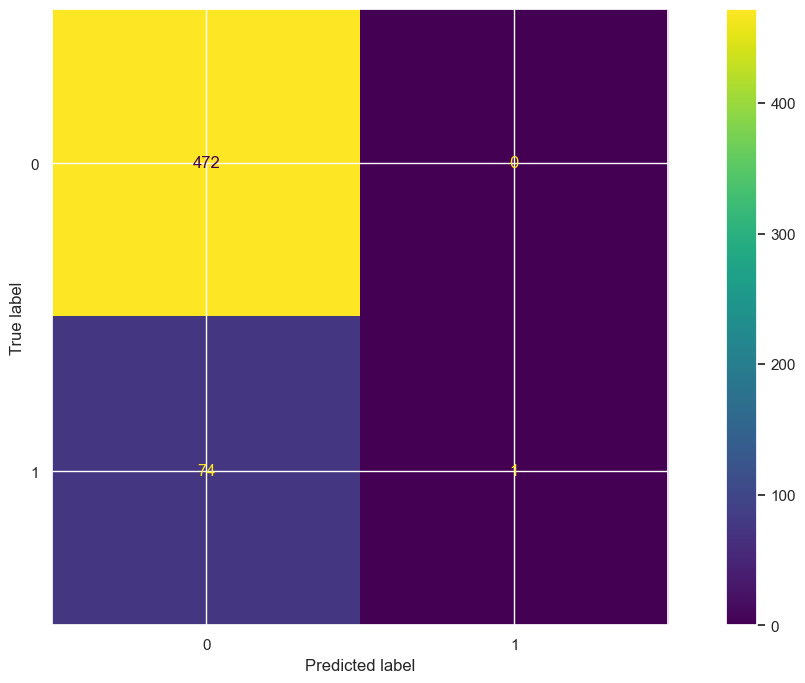

In [538]:
disp.plot()

In [539]:
y_test_proba = model.predict_proba(X_test)[:, -1]


In [540]:
y_test_proba

array([0.02746143, 0.17083716, 0.3820368 , 0.13651694, 0.00398877,
       0.18856766, 0.24659718, 0.27271491, 0.3102638 , 0.04185999,
       0.05846932, 0.02566976, 0.00794532, 0.12243303, 0.11088229,
       0.28390404, 0.03650476, 0.11226321, 0.15354338, 0.04751958,
       0.08121568, 0.07556266, 0.11186274, 0.13566553, 0.00861821,
       0.05148862, 0.14055098, 0.42236636, 0.17356244, 0.01220249,
       0.13515443, 0.04714957, 0.01206097, 0.13603717, 0.10213285,
       0.29309721, 0.12149496, 0.11917354, 0.04465988, 0.16769176,
       0.04586269, 0.0065789 , 0.02323872, 0.27680853, 0.01703659,
       0.16744717, 0.06263945, 0.05408146, 0.21718635, 0.32908619,
       0.25278986, 0.13637979, 0.01181558, 0.1667326 , 0.05808203,
       0.37374344, 0.06071649, 0.00520598, 0.01787559, 0.16760901,
       0.21850551, 0.26902145, 0.26258659, 0.11693447, 0.13474778,
       0.46708836, 0.02446484, 0.16987511, 0.07478511, 0.3073365 ,
       0.10758197, 0.00318429, 0.45091905, 0.38130588, 0.13220

Проверим KNN

In [541]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [542]:
y_pred = model.predict(X_test)

c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\subp

In [543]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       472
           1       0.00      0.00      0.00        75

    accuracy                           0.86       547
   macro avg       0.43      0.50      0.46       547
weighted avg       0.74      0.86      0.80       547



c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

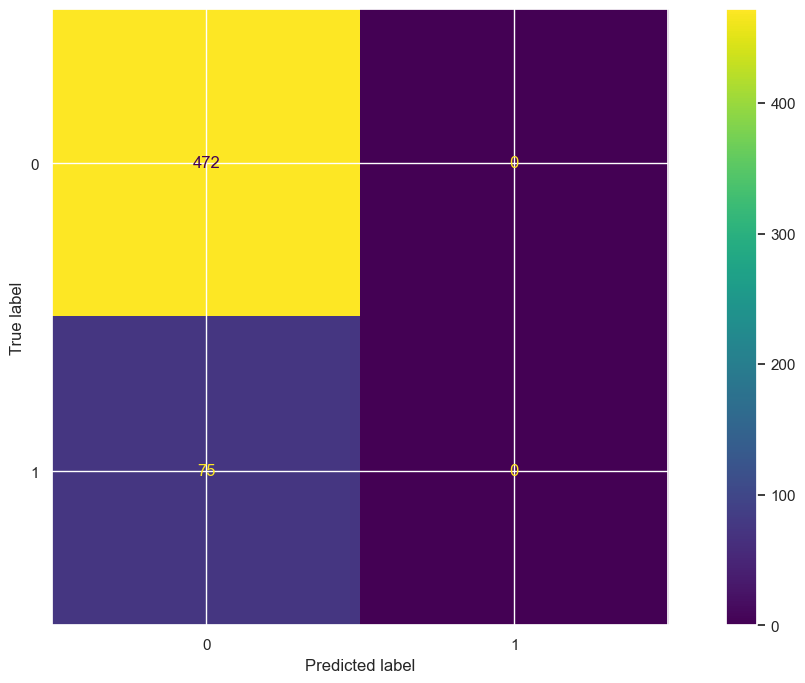

In [544]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

Проверим SVM

In [2]:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train.iloc[:, [2, 3]], y_train)

NameError: name 'SVC' is not defined

In [546]:
y_pred = model.predict(X_test.iloc[:, [2, 3]])

In [547]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       472
           1       0.00      0.00      0.00        75

    accuracy                           0.86       547
   macro avg       0.43      0.50      0.46       547
weighted avg       0.74      0.86      0.80       547



c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

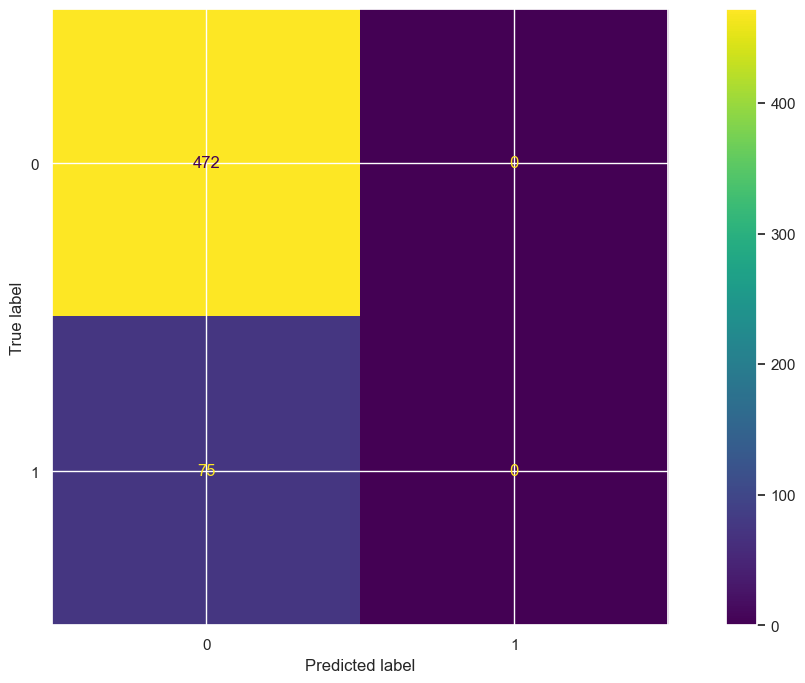

In [548]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [549]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [550]:
y_pred = model.predict(X_test)

In [551]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       472
           1       0.00      0.00      0.00        75

    accuracy                           0.86       547
   macro avg       0.43      0.50      0.46       547
weighted avg       0.74      0.86      0.80       547



c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Виктория\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

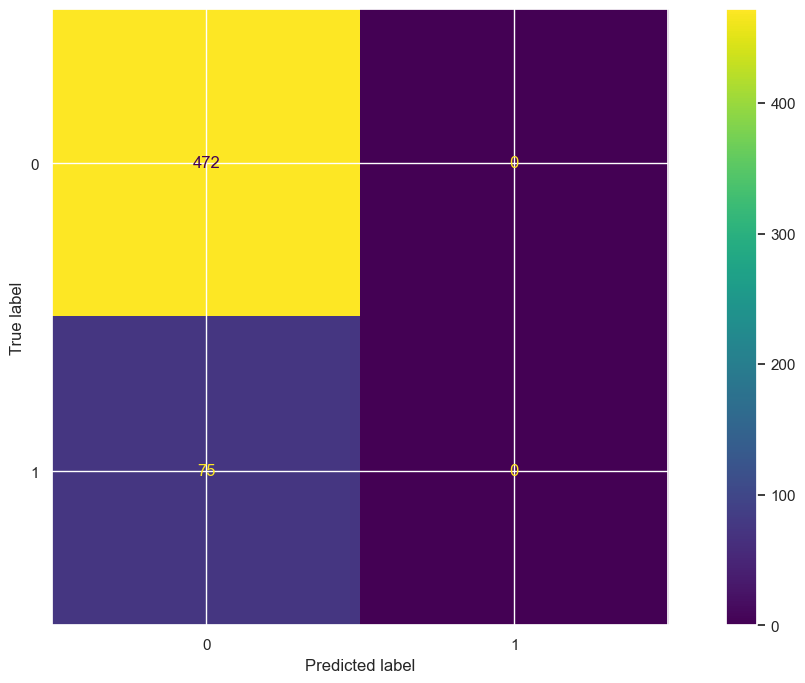

In [552]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()

In [553]:
from sklearn.decomposition import PCA



Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Альтернативно суть PCA можно определить как линейное проецирование, минимизирующее среднеквадратичное расстояние между исходными точками и их проекциями.

Изначально матрица признаков обязательно центрируется, чтобы первая главная компонента могла соответствовать направлению максимальной вариации данных, а не просто их среднему значению. Обычно нахождение главных компонент сводится к двум основным методам:

* Вычисление собственных векторов и собственных значений ковариационной матрицы данных. Поскольку ковариационная матрица отражает степень линейной связи между различными переменными, то собственные вектора этой матрицы будут задавать направления, вдоль которых дисперсия данных максимальна, а собственные значения — величину этой дисперсии. Собственное значение, соответствующее собственному вектору, характеризует вклад этого вектора в объяснение дисперсии данных и чем больше собственное значение, тем значимее главная компонента. Обычно отбираются только те главные компоненты, которые объясняют заданный уровень дисперсии, например, 95%.

* Вычисление сингулярного разложения матрицы данных. Сингулярное разложение — это способ представления любой матрицы в виде произведения трёх других матриц: левой сингулярной матрицы U, диагональной матрицы сингулярных значений S и правой сингулярной матрицы V, где сингулярные значения — это квадратные корни собственных значений ковариационной матрицы данных (именно для этого в данном случае выполняется предварительное центрирование данных), правая сингулярная матрица V будет соответствовать собственным векторам ковариационной матрицы данных, а левая U будет являться проекцией исходных данных на главные компоненты, определённые матрицей V. Таким образом, сингулярное разложение также позволяет выделить главные компоненты, но без необходимости в вычислении ковариационной матрицы. Помимо того, что такое решение более эффективно, оно считается более численно стабильным, поскольку не требует вычисления ковариационной матрицы напрямую, которая может быть плохо обусловлена в случае сильной корреляции признаков. Именно данный подход используется в реализации scikit-learn

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет.








In [554]:
pca = PCA(n_components=7)

In [555]:
pcaX = pca.fit_transform(X)

In [556]:
X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.33)

In [557]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [558]:
y_pred = model.predict(X_test)

In [559]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.49      0.64       468
           1       0.22      0.84      0.34        79

    accuracy                           0.54       547
   macro avg       0.58      0.66      0.49       547
weighted avg       0.84      0.54      0.60       547



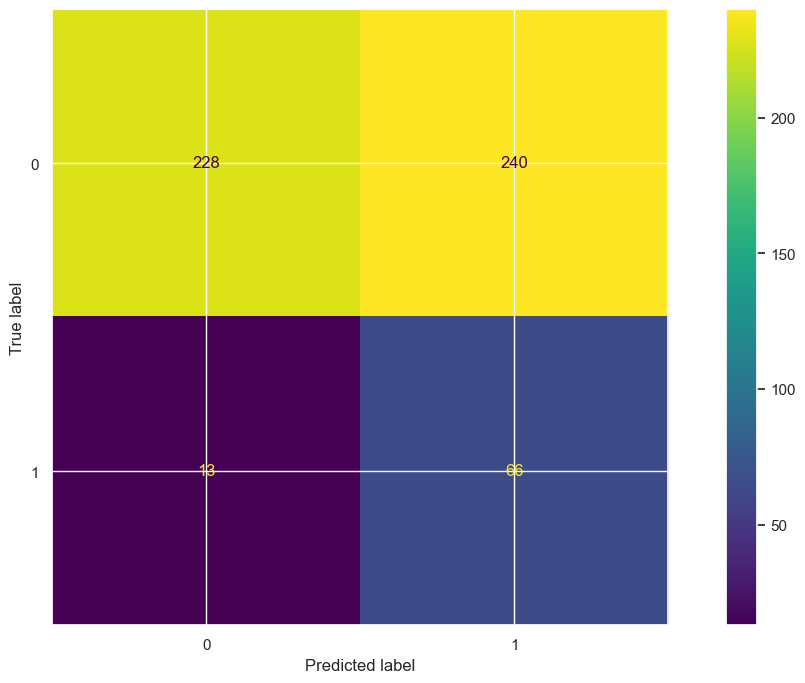

In [560]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
   display_labels=model.classes_)
disp.plot()